# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Load Dataset

In [2]:
df=pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


# Describe of Features

In [3]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


# Plot of Features

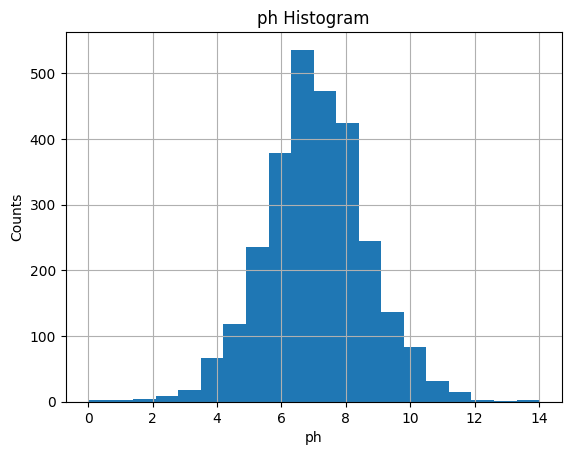

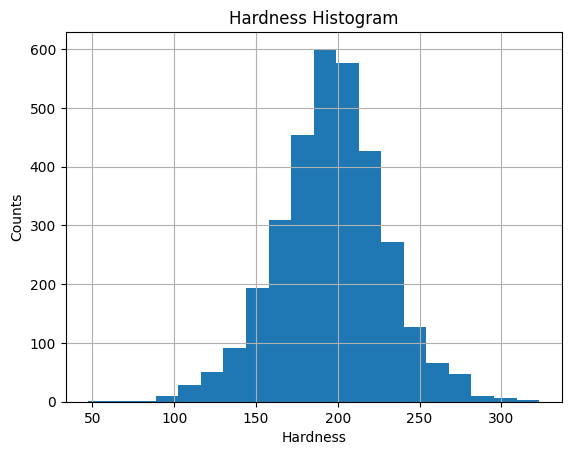

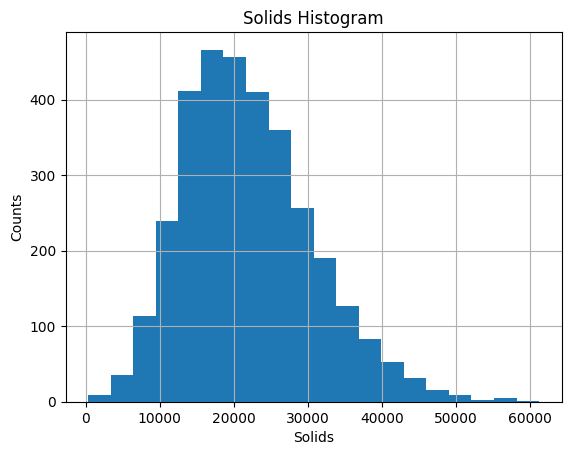

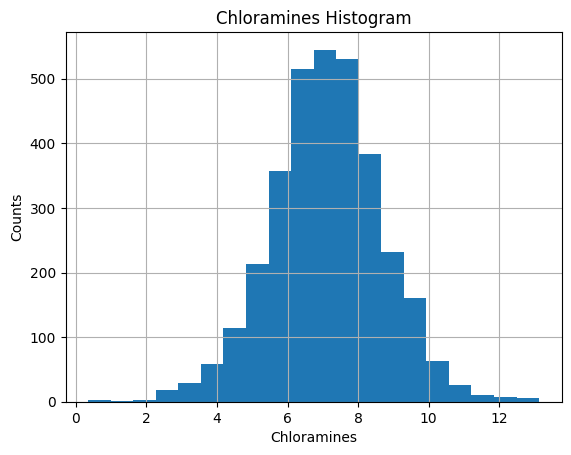

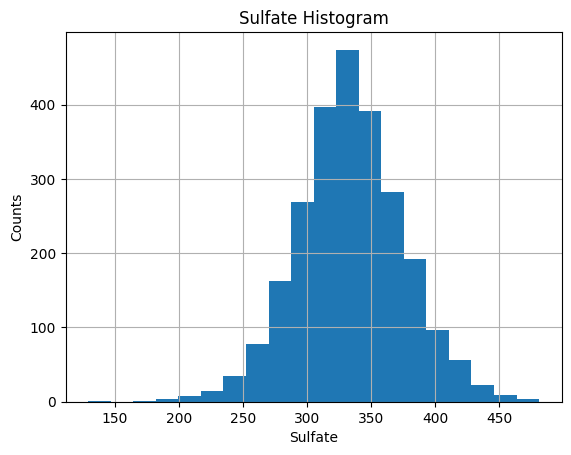

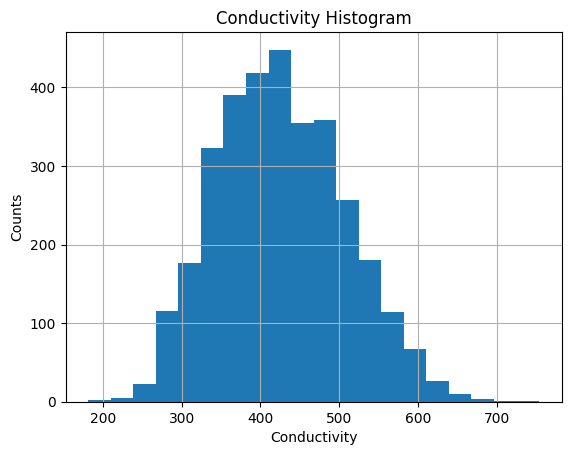

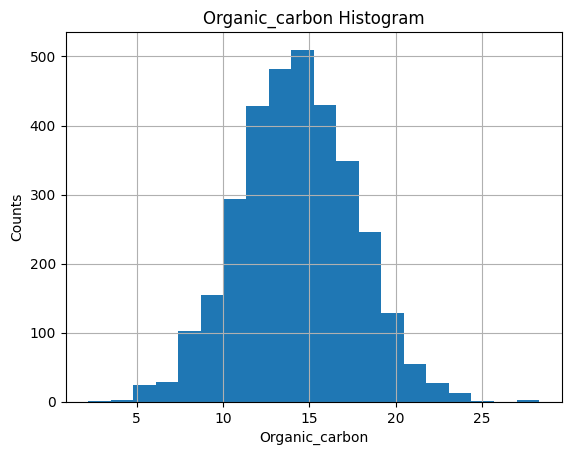

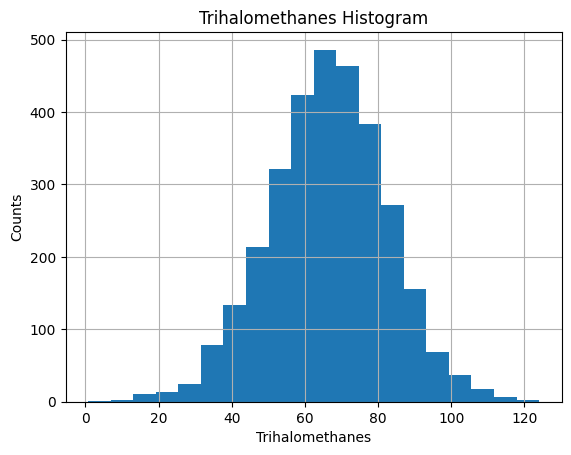

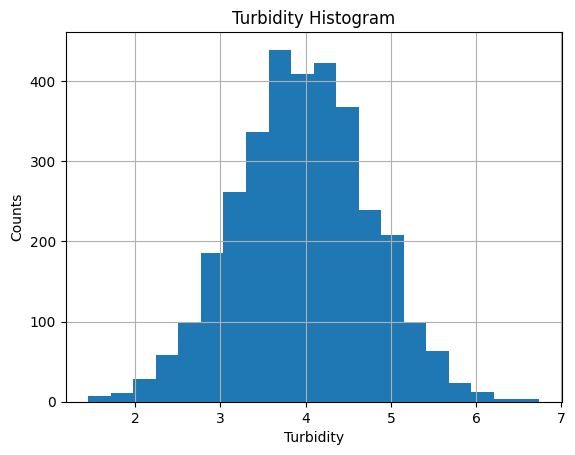

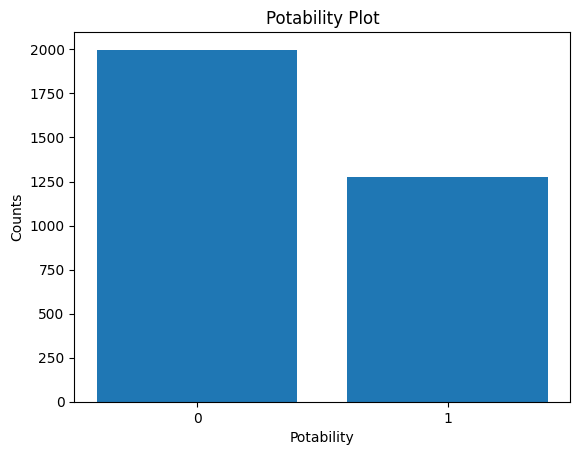

In [4]:
for column in df:
  if column!='Potability':
    df[column].hist(bins=20)
    plt.title( column+ ' Histogram')
  else:
    values = ['0','1']
    count=[df[column].value_counts()[0],df[column].value_counts()[1]]
    plt.bar(values, count)
    plt.title(column+' Plot')
  plt.xlabel(column)
  plt.ylabel('Counts')
  plt.show()

# Number of missing values for each feature

In [5]:
print("\nMissing values per feature is ")
print(df.isnull().sum(axis='rows'))



Missing values per feature is 
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


# Percentages of potable and non-potable water

In [6]:
total_count=df['Potability'].count()
non_potable_per=df['Potability'].value_counts()[0]/total_count
potable_per=1-non_potable_per

print(f'The percentage of potable water is:{potable_per*100:.2f}%')
print(f'The percentage of non-potable water is:{non_potable_per*100:.2f}%')

The percentage of potable water is:39.01%
The percentage of non-potable water is:60.99%


# Εvaluation of data quality

Η ποιότητα των δεδομένων είναι μέτρια προς κακή, καθώς υπάρχουν αρκετές ελλιπείς τιμές σε κάποια χαρακτηριστικά . Παρ’ όλα αυτά, από τα ιστιογράμματα  φαίνεται πως τα περισσότερα χαρακτηριστικά ακολουθούν κανονική κατανομή, κάτι που βοηθά στην εκπαίδευση του μοντέλου.

# Percentages of potable and non-potable water for ph < 6.5

In [7]:
low_ph=df[df['ph']<6.5]
total_count=low_ph['Potability'].count()
non_potable_low_per=low_ph['Potability'].value_counts()[0]/total_count
potable_low_per=1-non_potable_low_per
print(f'The percentage of potable water is:{potable_low_per*100:.2f}%')
print(f'The percentage of non-potable water is:{non_potable_low_per*100:.2f}%')


The percentage of potable water is:36.78%
The percentage of non-potable water is:63.22%


# Percentages of potable and non-potable water for ph[6.5,8.5]

In [8]:
ok_ph=df[np.logical_and(df['ph']>=6.5,df['ph']<=8.5)]
total_count=ok_ph['Potability'].count()
non_potable_ok_per=ok_ph['Potability'].value_counts()[0]/total_count
potable_ok_per=1-non_potable_ok_per
print(f'The percentage of potable water is:{potable_ok_per*100:.2f}%')
print(f'The percentage of non-potable water is:{non_potable_ok_per*100:.2f}%')

The percentage of potable water is:43.90%
The percentage of non-potable water is:56.10%


# Percentages of potable and non-potable water for ph>8.5

In [9]:
high_ph=df[df['ph']>8.5]
total_count=high_ph['Potability'].count()
non_potable_high_per=high_ph['Potability'].value_counts()[0]/total_count
potable_high_per=1-non_potable_high_per
print(f'The percentage of potable water is:{potable_high_per*100:.2f}%')
print(f'The percentage of non-potable water is:{non_potable_high_per*100:.2f}%')

The percentage of potable water is:33.13%
The percentage of non-potable water is:66.87%


Τα δεδομένα δείχνουν ότι περίπου το 44% των δειγμάτων με pH στο εύρος 6.5–8.5 είναι πόσιμα, ενώ εκτός αυτού του εύρους το ποσοστό πόσιμου νερού μειώνεται στο 33% και στο 39%.Τα ποσοστά αυτά θεωρώ οτι δεν επαληθεύουν καθόλου την πρόταση του ΠΟΥ καθώς το 44% είναι μικρό ποσοστό καθώς λιγότερα από τα μισά δείγματα είναι πόσιμα και από την άλλη τα υπόλοιπα 2 ποσοστά  είναι αρκετά κοντά σε  αυτό το ποσοστό.Αυτό το γεγονός δείχνει ότι το pH επηρεάζει την ποιότητα του νερού, αλλά δεν είναι ο μοναδικός καθοριστικός παράγοντας.Επισής το οτί το ποσόστο των πόσιμου νερού στο εύρος 6.5-8.5  είναι χαμηλό και δεν ανταποκρίνεται στην πρόταση του ΠΟΥ ίσως οφείλεται  στη ποιότητα των δεδομένων η οποία δεν είναι ικανοποιητική και στις τιμές που λείπουν σε κάποια παραδείγματα στο pH.

# Scatter Plot between Chloramines and pH

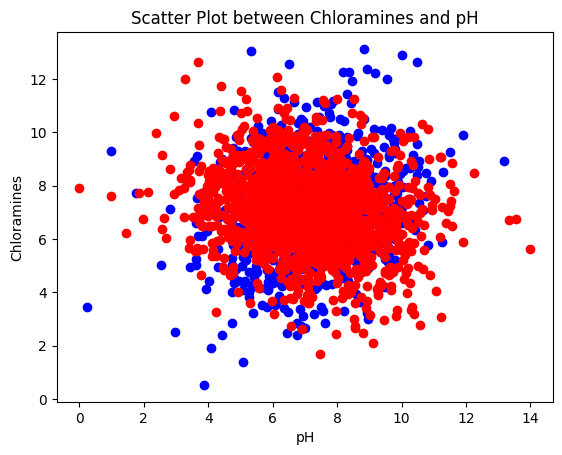

In [10]:
plt.scatter(df[df['Potability']==1]['ph'], df[df['Potability']==1]['Chloramines'], color='blue')
plt.scatter(df[df['Potability']==0]['ph'], df[df['Potability']==0]['Chloramines'], color='red')
plt.xlabel("pH")
plt.ylabel("Chloramines")
plt.title("Scatter Plot between Chloramines and pH")
plt.show()

# Separability between examples

Δεν υπάρχει καθαρός διαχωρισμός μεταξύ πόσιμου και μη πόσιμου νερού, επειδή το αν ένα δείγμα είναι πόσιμο εξαρτάται από πολλούς παράγοντες πέρα από το pH και τη χλωραμίνη. Επίσης, ελλιπείς τιμές στις μετρήσεις και η  επικάλυψη τιμών κάνουν τις δύο κατηγορίες να μην ξεχωρίζουν καθαρά.

# Filling in missing values with mean of each feature

In [11]:
for column in df:
 df[column] = df[column].fillna(df[column].mean())


# Convert DataFrame to Numpy arrays

In [12]:
input_df = df.drop(columns=['Potability'])
targets_df = df['Potability']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((3276, 9), (3276,))

# Split Dataset to Train-Test

In [13]:
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2293, 9), (2293,), (983, 9), (983,))

# Create DecisionTreeClassifier

In [14]:
model=DecisionTreeClassifier(random_state=seed)

# Train classifier on training set

In [15]:
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

# Evaluate classifier on test set

In [16]:
y_test_pred=model.predict(x_test)


In [17]:
test_accuracy=accuracy_score(y_test,y_test_pred)
test_accuracy_percentage = round(test_accuracy*100, 2)

print(f'The accuracy of the model in test set is: {test_accuracy_percentage}')

The accuracy of the model in test set is: 57.48


# Evaluate classiifier on test set

In [18]:
y_train_pred=model.predict(x_train)

In [19]:
train_accuracy=accuracy_score(y_train,y_train_pred)
train_accuracy_percentage = round(train_accuracy*100, 2)

print(f'The accuracy of the model in train set is: {train_accuracy_percentage}')

The accuracy of the model in train set is: 100.0


# Re-training and Evaluate the classifier by trying different combinations

In [20]:
criterion = ['gini', 'entropy']
max_depth = [None, 3, 5]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
max_features = [None, 'sqrt']
cost_complexity_pruning = [0, 0.01]
results = []

for criterion in criterion:
    for maxDepth in max_depth:
        for minSamplesSplit in min_samples_split:
            for minSamplesLeaf in min_samples_leaf:
                for maxFeatures in max_features:
                    for ccp_alpha in cost_complexity_pruning:
                        tree_model = DecisionTreeClassifier(
                            criterion=criterion,
                            max_depth=maxDepth,
                            min_samples_split=minSamplesSplit,
                            min_samples_leaf=minSamplesLeaf,
                            max_features=maxFeatures,
                            ccp_alpha=ccp_alpha,
                            random_state=seed
                        )

                        tree_model.fit(x_train, y_train)
                        y_train_pred=tree_model.predict(x_train)
                        y_test_pred=tree_model.predict(x_test)
                        train_acc = accuracy_score(y_train, y_train_pred)
                        test_acc = accuracy_score(y_test, y_test_pred)

                        results.append({
                            'criterion': criterion,
                            'max_depth': maxDepth,
                            'min_samples_split': minSamplesSplit,
                            'min_samples_leaf': minSamplesLeaf,
                            'max_features': maxFeatures,
                            'ccp_alpha': ccp_alpha,
                            'train_acc': train_acc,
                            'test_acc': test_acc
                        })

# Create a new dataFrame with the results that you will have for columns of the parameters

In [21]:
new_df=pd.DataFrame(results)
new_df

,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,ccp_alpha,train_acc,test_acc
0,gini,NaN,2,1,None,0.00,1.000000,0.574771
1,gini,NaN,2,1,None,0.01,0.605321,0.620549
2,gini,NaN,2,1,sqrt,0.00,1.000000,0.622584
3,gini,NaN,2,1,sqrt,0.01,0.605321,0.620549
4,gini,NaN,2,2,None,0.00,0.951592,0.581892
...,...,...,...,...,...,...,...,...
91,entropy,5.0,5,1,sqrt,0.01,0.620148,0.626653
92,entropy,5.0,5,2,None,0.00,0.671173,0.655137
93,entropy,5.0,5,2,None,0.01,0.620148,0.626653
94,entropy,5.0,5,2,sqrt,0.00,0.642826,0.620549


# Select the combination with the highest accuracy in the test when max-depth = 3.

In [22]:
maxDepth3 =new_df[new_df['max_depth'] == 3]
maxDepth3=maxDepth3.sort_values(by='test_acc', ascending=False)
row_high_accuracy=maxDepth3.iloc[0]
row_high_accuracy


,72
criterion,entropy
max_depth,3.0
min_samples_split,5
min_samples_leaf,1
max_features,None
ccp_alpha,0.0
train_acc,0.641082
test_acc,0.639878


# Re-training the tree with parameters from row with highest test accuracy when max-depth=3

In [23]:
new_tree=DecisionTreeClassifier(criterion=row_high_accuracy['criterion'],
    max_depth=int(row_high_accuracy['max_depth']),
    min_samples_split=row_high_accuracy['min_samples_split'],
    min_samples_leaf=row_high_accuracy['min_samples_leaf'],
    max_features=row_high_accuracy['max_features'],
    ccp_alpha=row_high_accuracy['ccp_alpha'],
    random_state=seed
)
new_tree.fit(x_train,y_train)



DecisionTreeClassifier(ccp_alpha=np.float64(0.0), criterion='entropy',
                       max_depth=3, min_samples_leaf=np.int64(1),
                       min_samples_split=np.int64(5), random_state=0)

# Plot Tree

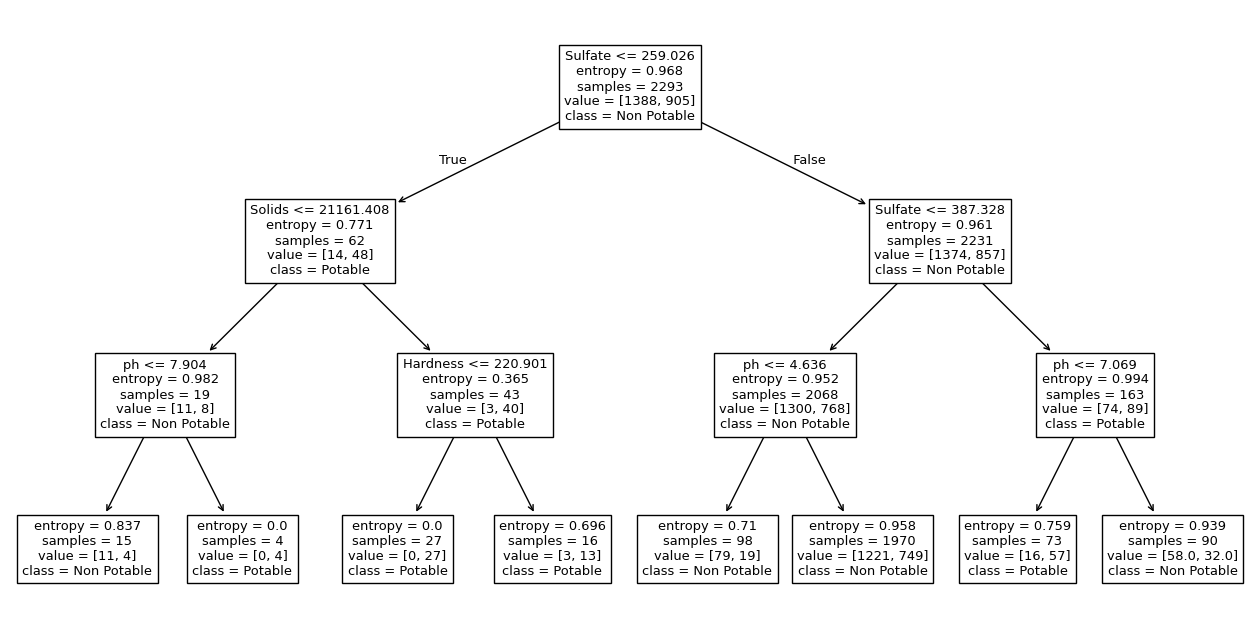

In [25]:
plt.figure(figsize=(16,8))
tree.plot_tree(new_tree,  feature_names=input_df.columns,
          class_names=['Non Potable', 'Potable'],
         )
plt.show()

# Description of the rules that the tree exported

To δέντρο που δημιουργήθηκε με max_depth=3 για το καλύτερο test_accuracy εξαγεί τους παρακάτω κανόνες:

*   Αν το sulfate <=259.026,το Solids <=21161.408 και pH<=7.904 τότε  μη πόσιμο νερό.
*  Αν το sulfate <=259.026,το Solids >21161.408 και Hardness τότε πόσιμο νερό.
*  Αν το sulfate <=259.026,το Solids <=21161.408 και pH>7.904 τότε πόσιμο νερό.
*  Αν το sulfate >259.026,το sulfate <=387.328 και pH τότε  μη πόσιμο νερό.
* Αν το  sulfate >259.026,το sulfate >387.328 και pH<=7.069 τότε πόσιμο νερό.
* Αν το  sulfate >259.026,το sulfate >387.328 και pH>7.069 τότε μη πόσιμο νερό.


# Select the combination with the highest accuracy in the test.

In [26]:
sorted_df=new_df.sort_values(by='test_acc', ascending=False)
row_high_accuracy=sorted_df.iloc[0]
row_high_accuracy

,92
criterion,entropy
max_depth,5.0
min_samples_split,5
min_samples_leaf,2
max_features,None
ccp_alpha,0.0
train_acc,0.671173
test_acc,0.655137


# Re-training the tree with parameters from row with highest test accuracy

In [27]:
new_tree=DecisionTreeClassifier(criterion=row_high_accuracy['criterion'],
    max_depth=int(row_high_accuracy['max_depth']),
    min_samples_split=row_high_accuracy['min_samples_split'],
    min_samples_leaf=row_high_accuracy['min_samples_leaf'],
    max_features=row_high_accuracy['max_features'],
    ccp_alpha=row_high_accuracy['ccp_alpha'],
    random_state=seed
)
new_tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0), criterion='entropy',
                       max_depth=5, min_samples_leaf=np.int64(2),
                       min_samples_split=np.int64(5), random_state=0)

# Create a bar plot showing the importance of each feature

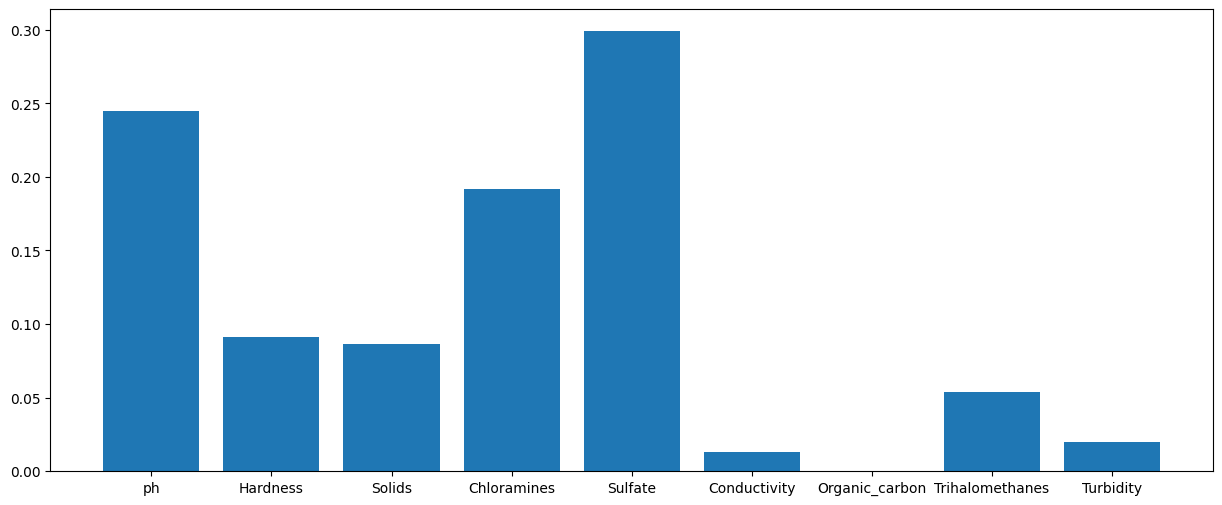

In [28]:
importance = new_tree.feature_importances_
plt.figure(figsize=(15,6))
plt.bar([features for features in input_df], importance)
plt.show()

Από το ραβδόγραμμα σημαντικότητας των χαρακτηριστικών του δέντρου με την καλύτερη ακρίβεια προκύπτει ότι οι πιο καθοριστικοί παράγοντες για την εξαγωγή του νερού είναι οι τιμές των Sulfate, pH, Solids, Hardness και Chloramines.Όσο μεγαλύτρη είναι η τιμή σημαντικότητας κάποιου χαρακτηριστικού τόσο πιο χρήσιμο είναι.Επομένως, αν η συσκευή μπορεί να πραγματοποιεί μόνο 5 μετρήσεις, αυτά τα χαρακτηριστικά είναι τα καταλληλότερα, καθώς προσφέρουν τη μεγαλύτερη πληροφορία.

# Τhe reasons why a Random Forest could potentially achieve better accuracy than a Decision Tree.

Ένα Τυχαίο Δάσος συνήθως πετυχαίνει καλύτερη ακρίβεια από ένα απλό Δέντρο Απόφασης, γιατί δεν βασίζεται σε ένα μόνο δέντρο, αλλά σε πολλά δέντρα που συνεργάζονται. Έτσι αν κάποια δένδρα υπολογίσουν λάθος πρόβλεψη πολλά άλλα θα υπολογίσουν τη σωστή και συνολικά η πρόβλεψη θα κινηθεί προς τη σωστή κατεύθυνση.Τέλος με την χρήση τυχαίου δάσους μειώνεται η πιθανότητα να υπάξει overfitting το οποίο είναι ένα από τα μειωνεκτήματα του δέντρου απόφασης.

# Build a function that create, fits and evaluates RandomForestClassifier with the parameter n_estimators.

In [29]:
def randomForest(n_estimators):
  model=RandomForestClassifier(n_estimators=n_estimators,random_state=seed)
  model.fit(x_train,y_train)
  y_test_pred=model.predict(x_test)
  y_train_pred=model.predict(x_train)
  train_accuracy = accuracy_score(y_train,y_train_pred)
  test_accuracy = accuracy_score(y_test,y_test_pred)
  return train_accuracy,test_accuracy


# Evaluate a RandomForestClassifier with n_estimators=50 on test and train set

In [30]:
test_accuracy_50=randomForest(50)[0]
train_accuracy_50=randomForest(50)[1]
test_accuracy_percentage_50 = round(test_accuracy_50*100, 2)
train_accuracy_percentage_50 = round(train_accuracy_50*100, 2)
print(f'The accuracy of the model in test set is: {test_accuracy_percentage_50}')
print(f'The accuracy of the model in train set is: {train_accuracy_percentage_50}')

The accuracy of the model in test set is: 100.0
The accuracy of the model in train set is: 69.38


# Evaluate a RandomForestClassifier with n_estimators=100 on test and train set

In [31]:
test_accuracy_100=randomForest(100)[0]
train_accuracy_100=randomForest(100)[1]
test_accuracy_percentage_100 = round(test_accuracy_100*100, 2)
train_accuracy_percentage_100 = round(train_accuracy_100*100, 2)
print(f'The accuracy of the model in test set is: {test_accuracy_percentage_100}')
print(f'The accuracy of the model in train set is: {train_accuracy_percentage_100}')

The accuracy of the model in test set is: 100.0
The accuracy of the model in train set is: 69.79


# Evaluate a RandomForestClassifier with n_estimators=200 on test and train set

In [32]:
test_accuracy_200=randomForest(200)[0]
train_accuracy_200=randomForest(200)[1]
test_accuracy_percentage_200 = round(test_accuracy_200*100, 2)
train_accuracy_percentage_200 = round(train_accuracy_200*100, 2)
print(f'The accuracy of the model in test set is: {test_accuracy_percentage_200}')
print(f'The accuracy of the model in train set is: {train_accuracy_percentage_200}')

The accuracy of the model in test set is: 100.0
The accuracy of the model in train set is: 68.97


# Prediction of potable and non-potable water

Σε αυτό το πρόβλημα, είναι προτιμότερο το μοντέλο να προβλέπει σωστά το μη πόσιμο νερό, ακόμη κι αν μειώνεται ελαφρώς η ακρίβεια για το πόσιμο.Αυτό συμβαίνει γιατί αν το μοντέλο προβλέψει πόσιμο ενώ δεν είναι, τότε κινδυνεύει η υγεία αυτών που θα πιούνε.Ενώ από την άλλη πλευρά αν το μοντέλο πει “μη πόσιμο” ενώ είναι, τότε απλώς απορρίπτεται νερό που θα μπορούσε να χρησιμοποιηθει.